# Evaluation der Forumtracking-Trajektorienbündel


## 1. Preprocessing

In [1]:
#imports

import numpy as np
from scipy.optimize import least_squares
from matplotlib import pyplot as plt

from sklearn.gaussian_process.kernels import RBF, Matern
import h5py

final_dataset = "forumtracking.hdf5"

max_trajectory_length = 100
max_nr_trajectories = 100
filter_parameter = ("", 3)

origin = "4"

%run preprocessing.py
# defines:
# filter_by_origin(path, goal, target=None)
# filter_by_length(path, length, target=None)
# filter_by_number(path, number, target=None)
# filter_trajectory(data, kind=None, windowsize=3)
# adjust_trajectory_length(trajectory, length)
# dp_algorithm(tolerance, trajectory)
# dp_cost_function(tolerance, trajectory)
# process_trajectory(trajectory, length, filter_parameter)

%run trajectory_simulation.py
# defines:
# def create_trajectories(mean, n_sample, len_sample, n_base, \
#                         len_base, base_type, var_base, \
#                         length_scale, total_scale, kind="RBF", \
#                         plot=False):


def get_xangle(u,deg=None):
    v = np.array([1,0])
    cosang = np.dot(u, v)
    sinang = np.linalg.norm(np.cross(u, v))
    if deg:
        return np.rad2deg(np.arctan2(sinang, cosang))
    else:
        return np.arctan2(sinang, cosang)

def rotate(points, theta):
    Phi = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    return np.matmul(Phi, points.T).T

Phi = lambda theta : np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

/home/clemens/.anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
i = 0
with h5py.File(final_dataset, "r") as f:
    count_total = f.attrs["TotalNrTrajectories"]
    X_forum = np.zeros((count_total, max_trajectory_length,2))
    y_forum = np.zeros((count_total,))
    for goal in f:
        for traj in f[goal]:
            trajectory = process_trajectory(f[goal+"/"+traj+"/Positions"][:], \
                                                  max_trajectory_length, \
                                                  filter_parameter)
            X_forum[i] = trajectory
            y_forum[i] = int(goal)
            i += 1

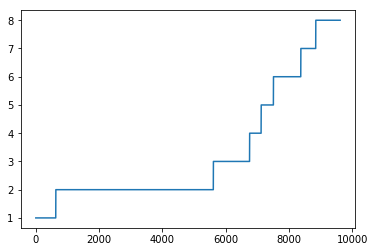

In [4]:
plt.plot(y_forum)
plt.show()

In [ ]:
means = np.load("mean_per_bundle.npy")
std = np.load("std_per_bundle.npy")

## Ziel 7

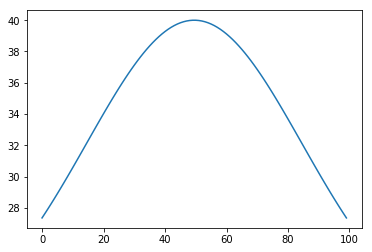

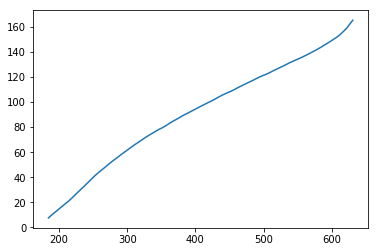

In [53]:
target = 7

data = X_forum[np.where(y_forum==target)]
mx = np.mean(data[:,:,0],axis=0)
my = np.mean(data[:,:,1],axis=0)
mean7 = np.vstack([mx,my]).T

std7 = (20+20*np.exp(-1*np.linspace(-1,1,max_trajectory_length)**2))

plt.plot(std7)
plt.show()

plt.plot(mean7[:,0],mean7[:,1])
plt.show()

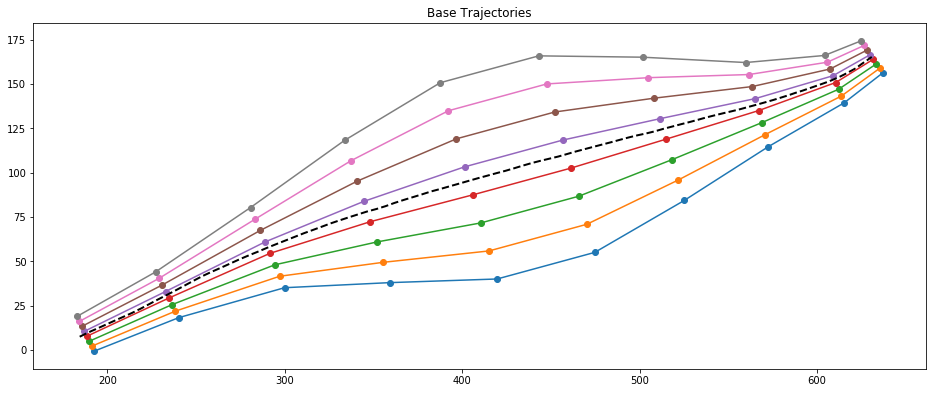

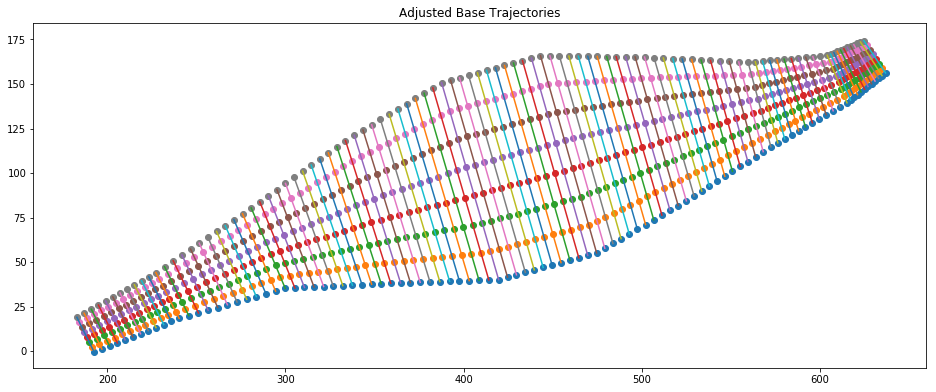

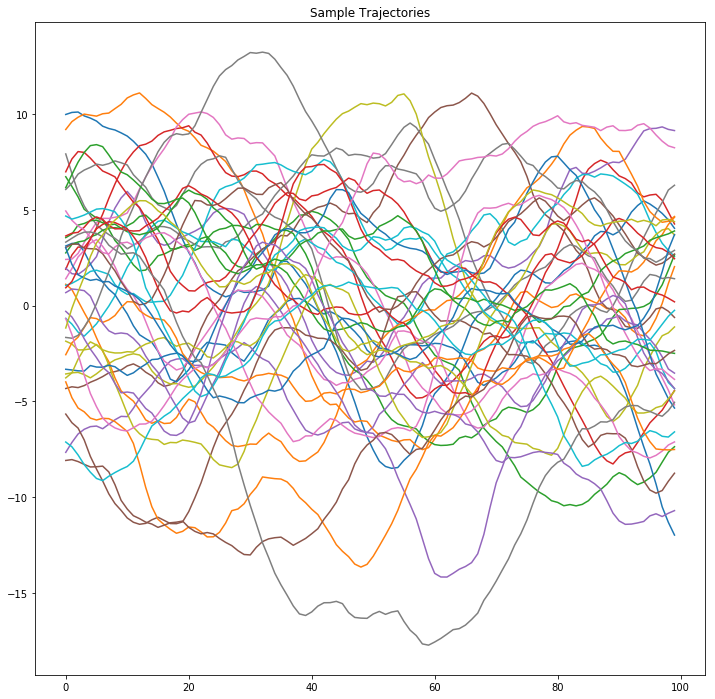

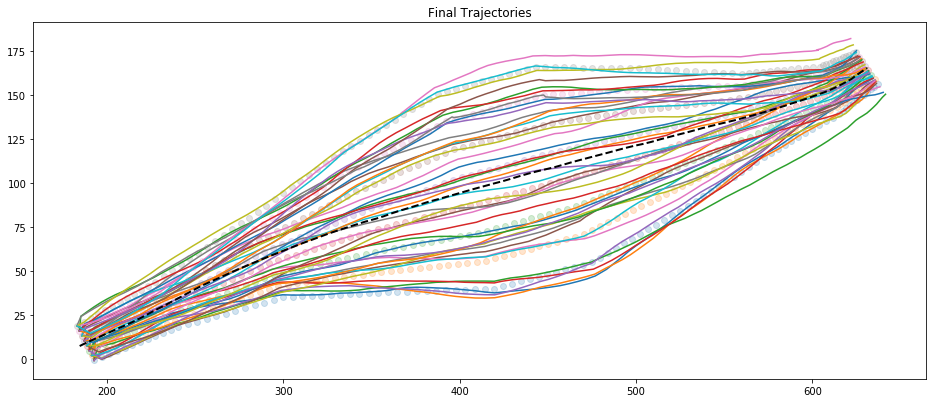

In [55]:
n_total = 40
len_total = 100

n_base = 8
len_base = 10

var_base = 0.5*(20+100*np.exp(-1*np.linspace(-2,2,len_base)**2))
#var_base = std7
base_type = "linear"

length_scale = 20
total_scale = 5
cov_type = "Matern"

#bases = create_bases(mean, n_base, len_base, var_base, plot=True)
#adj_bases = adjust_base_length(bases, len_total, plot=True)
#samples = create_samples(n_total, len_total, length_scale, total_scale, kind, plot=True)

sim7 = create_trajectories(mean7, n_total, len_total, n_base, len_base, base_type,\
                            var_base, length_scale, total_scale, cov_type, plot=True)

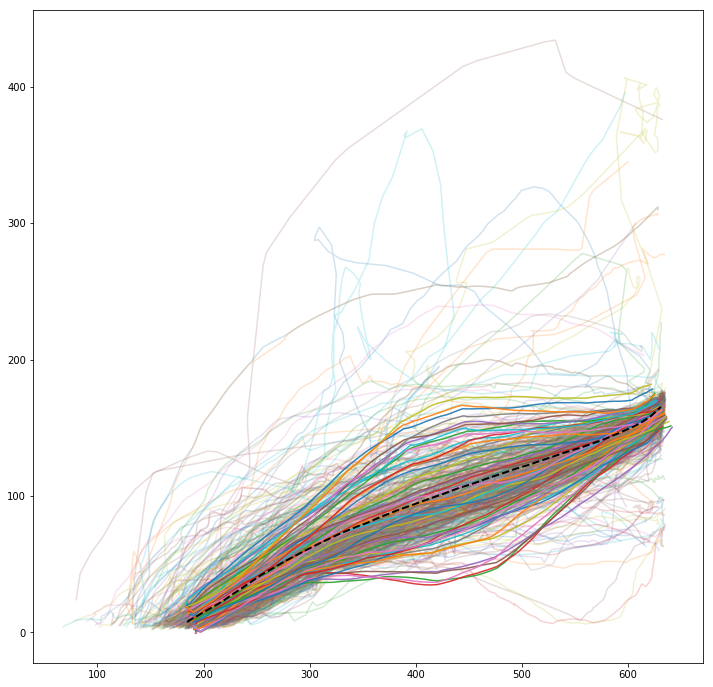

In [57]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt_stdx,plt_stdy = [],[]

for i in range(1,max_trajectory_length):
#for i in range(1,50):
    theta = get_xangle(mean7[i]-mean7[i-1])

    std = np.zeros((2,2))
    std[:,0] = [-std7[i], std7[i]]
    #error[:,0] = [-3*np.std(points), 3*np.std(points)]

    std = mean8[i] + rotate(std,-1*theta)
    plt_stdx.append(std.T[0])
    plt_stdy.append(std.T[1])
    
    
for i in range(len(data)):
    ax.plot(data[i,:,0], data[i,:,1],alpha=0.2)
for i in range(len(sim7)):
    ax.plot(sim7[i,:,0], sim7[i,:,1],alpha=0.9)
    
ax.plot(mean7[:,0], mean7[:,1], linewidth=2, c="k", linestyle="--")
#ax.scatter(plt_stdx, plt_stdy,linewidth=3, c="r",linestyle="--")
plt.show()

## Ziel 8

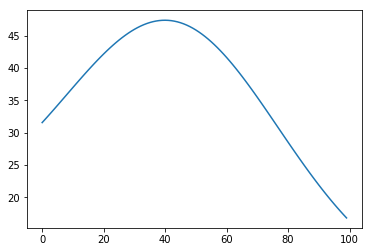

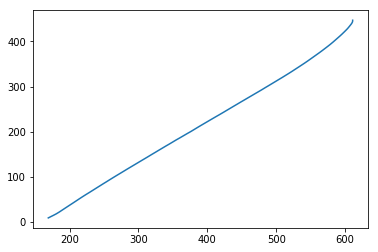

In [6]:
target = 8

data = X_forum[np.where(y_forum==target)]
mx = np.mean(data[:,:,0],axis=0)
my = np.mean(data[:,:,1],axis=0)
mean8 = np.vstack([mx,my]).T

std8 = 1*(10+30*np.exp(-1*np.linspace(-1,1,max_trajectory_length)**2)) * np.linspace(1.5,.8,max_trajectory_length)

plt.plot(std8)
plt.show()

plt.plot(mean8[:,0],mean8[:,1])
plt.show()

In [19]:
n_total = 40
len_total = 100

n_base = 8
len_base = 10

var_base = 0.5*(20+100*np.exp(-1*np.linspace(-2,2,len_base)**2))
base_type = "linear"

length_scale = 10
total_scale = 5
cov_type = "Matern"

#bases = create_bases(mean, n_base, len_base, var_base, plot=True)
#adj_bases = adjust_base_length(bases, len_total, plot=True)
#samples = create_samples(n_total, len_total, length_scale, total_scale, kind, plot=True)

sim8 = create_trajectories(mean8, n_total, len_total, n_base, len_base, base_type,\
                            var_base, length_scale, total_scale, cov_type, plot=False)

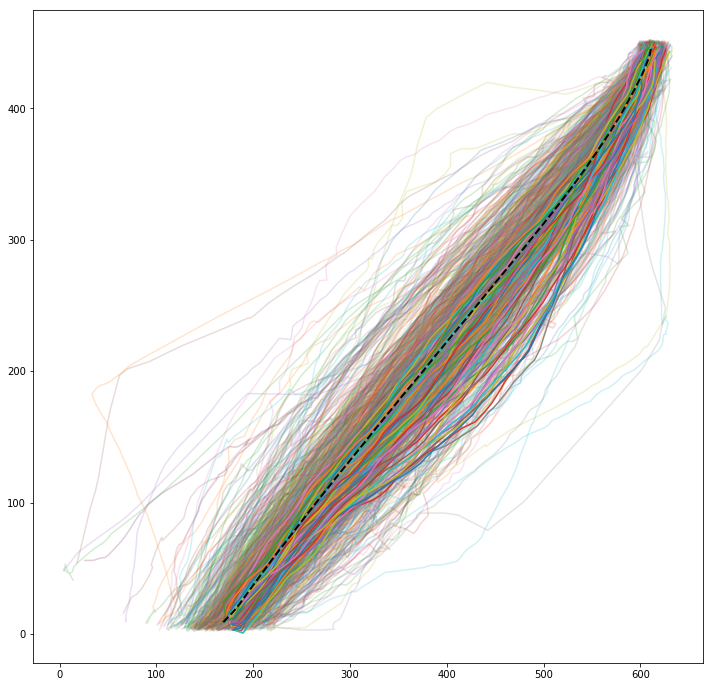

In [22]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
plt_stdx,plt_stdy = [],[]

for i in range(1,max_trajectory_length):
#for i in range(1,50):
    theta = get_xangle(mean8[i]-mean8[i-1])

    std = np.zeros((2,2))
    std[:,0] = [-std8[i], std8[i]]
    #error[:,0] = [-3*np.std(points), 3*np.std(points)]

    std = mean8[i] + rotate(std,-1*theta)
    plt_stdx.append(std.T[0])
    plt_stdy.append(std.T[1])
    
    
for i in range(len(data)):
    ax.plot(data[i,:,0], data[i,:,1],alpha=0.2)

for i in range(len(sim8)):
    ax.plot(sim8[i,:,0], sim8[i,:,1],alpha=0.9)
    
ax.plot(mean8[:,0], mean8[:,1], linewidth=2, c="k", linestyle="--")
#ax.scatter(plt_stdx, plt_stdy,linewidth=3, c="r",linestyle="--")
plt.show()